## 4. Explorative Datenanalyse (Datenvisualisierung, statische Bewertung)
### Zusammenfassung:
- Der Datensatz ist unausgeglichen. Es gibt mehrere interessierten als uninteressierte Kunden. Das kann dazu führen, dass der Algorithmus von den Modellen beeinflusst wird.
- Männliche Kunden haben weniger Interesse als weibliche Kunden.
- Die meisten Kunden kommen aus Spanien.
- 25.07% von den Frauen tendieren die Bank zu verlassen
- 50,14% von den Kunden, die kein Interesse haben, kommen aus Spanien
- 16.45% von den männlichen Kunden tendieren die Bank zu verlassen.
- Die Kunden sind durchschnittlich 5 Jahren bei der Bank.
- Die männlichen Kunden benutzen öfter die Produkten von der Bank als die weibliche.
- Kunden mit 3 oder 4 Produkte von der Bank verlassen öfter die Bank.
- Kunden zwischen 31 und 40 Jahren alt und aus Spanien tendieren bei der Bank zu bleiben.
- Kunden mit einem Balancescore zwischen 200001 und 250900 haben die Wahrscheinlichkeit von 0.558, die Bank zu verlassen.
- Männliche Kunden mit einem niedrigen Creditscore und zwischen 41- 50 Jahren tendieren die Bank zu verlassen.


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

In [3]:
df = pd.read_parquet('df_prossesing.parquet')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_ord,CreditScore_ord,Balance_ord,EstimatedSalary_ord
0,1,15634602,Hargrave,619,1,0,42,2,0.00,1,1,1,101348.88,1,41 to 50,501 to 699,0 to 25000,100001 to 125000
1,2,15647311,Hill,608,0,0,41,1,83807.86,1,0,1,112542.58,0,41 to 50,501 to 699,50001 to 100000,100001 to 125000
2,3,15619304,Onio,502,1,0,42,8,159660.80,3,1,0,113931.57,1,41 to 50,501 to 699,100001 to 200000,100001 to 125000
3,4,15701354,Boni,699,1,0,39,1,0.00,2,0,0,93826.63,0,31 to 40,501 to 699,0 to 25000,75001 to 100000
4,5,15737888,Mitchell,850,0,0,43,2,125510.82,1,1,1,79084.10,0,41 to 50,700 to 950,100001 to 200000,75001 to 100000


## 4.1 Klassenungleichgewichten
Die Datenset ist unausgeglichen . In dem Datensatz gibt es eine sehr ungleiche Verteilung der Klassen

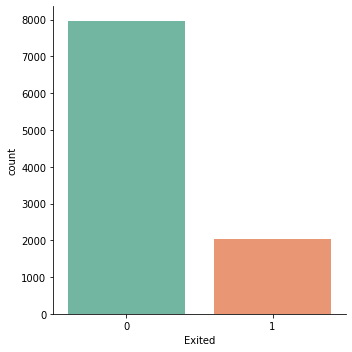

In [5]:
%matplotlib inline
sns.catplot(x="Exited", 
            kind="count", 
            palette="Set2", 
            data= df )

In [6]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

## 4.2 Interesse für die Spalte Exited
- Männliche Kunden haben mehr Interesse als weibliche Kunden.
- Männliche Kunden zwischen 41 und 50 Jahren tendieren die Bank zu verlassen.
- Aktive Kunden zwischen 41 und 50 Jahren tendieren bei der Bank zu bleiben.
- Kunden mit einem Balancescore zwischen 200001 und 250900 haben die Wahrscheinlichkeit von 0.558, die Bank zu verlassen.
- Kunden aus Spanien zeigen mehr Interesse.
- Kunden, die 3 oder 4 Produkte der Bank haben, verlassen öfter die Bank.


In [8]:
df[['Gender','Exited']].groupby('Gender').mean()

,Exited
Gender,
0,0.250715
1,0.164559


In [9]:
df[['Tenure','Exited']].groupby('Tenure').mean()

,Exited
Tenure,
0,0.230024
1,0.224155
2,0.191794
3,0.211100
4,0.205258
5,0.206522
6,0.202689
7,0.172179
8,0.192195


In [11]:
df[['Age_ord','Exited']].groupby('Age_ord').mean()

,Exited
Age_ord,
18 to 30,0.056180
31 to 40,0.107583
41 to 50,0.396535
51 to 60,0.252212
61 to 100,0.083333


In [12]:
df[['IsActiveMember','Exited']].groupby('IsActiveMember').mean()

,Exited
IsActiveMember,
0,0.268509
1,0.142691


In [13]:
df[['CreditScore_ord','Exited']].groupby('CreditScore_ord').mean()

,Exited
CreditScore_ord,
350 to 500,0.230408
501 to 699,0.202852
700 to 950,0.198652


In [14]:
df[['Balance_ord','Exited']].groupby('Balance_ord').mean()

,Exited
Balance_ord,
0 to 25000,0.139111
25001 to 50000,0.318841
50001 to 100000,0.198807
100001 to 200000,0.250157
200001 to 250900,0.558824


In [8]:
df[['EstimatedSalary_ord','Exited']].groupby('EstimatedSalary_ord').mean()

,Exited
EstimatedSalary_ord,
0 to 25000,0.198850
25001 to 50000,0.199838
50001 to 75000,0.209614
75001 to 100000,0.187697
100001 to 125000,0.200627
125001 to 150000,0.204066
150001 to 175000,0.212552
175001 to 200000,0.216667


In [10]:
df[['Geography','Exited']].groupby('Geography').mean()

,Exited
Geography,
0,0.166734
1,0.161548
2,0.324432


In [12]:
df[['NumOfProducts','Exited']].groupby('NumOfProducts').mean()

,Exited
NumOfProducts,
1,0.277144
2,0.075817
3,0.827068
4,1.000000


In [13]:
df[['HasCrCard','Exited']].groupby('HasCrCard').mean()

,Exited
HasCrCard,
0,0.208149
1,0.201843


## 4.3 Interesse für  outliers.
- Bei Datensammeln wurde die Datei gelesen und untersucht. Es wurden outlier indentifiziert in den Spalten Age und CreditScore


<AxesSubplot:xlabel='Age'>

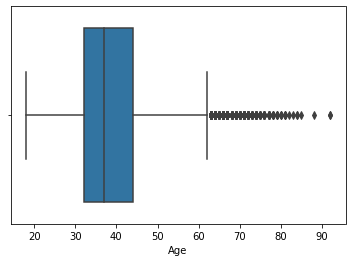

In [14]:
%matplotlib inline
sns.boxplot(df.Age)

<AxesSubplot:xlabel='CreditScore'>

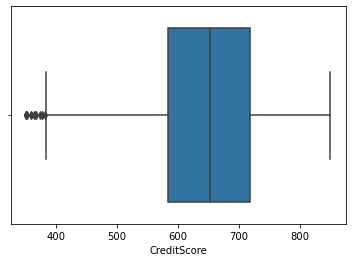

In [15]:
%matplotlib inline
sns.boxplot(df.CreditScore)


## 4.4 Interesse für die Spalte Gender
- Weibliche Kunden haben die Tendenz bei der Bank zu bleiben.
- Die meisten Kunden kommen aus Spanien und sind weiblich.
- 4543 weibliche und 5457 männliche Kunden
- 25% der männlichen Kunden verlassen die Bank
- 16% der weiblichen Kunden verlassen die Bank
- Weibliche und männliche Kunden haben entweder 1 oder 2 Produkten
- Die meisten Kunden sind seit 5 Jahren bei der Bank
- Weibliche Kunden haben die Tendenz bei der Bank zu bleiben.

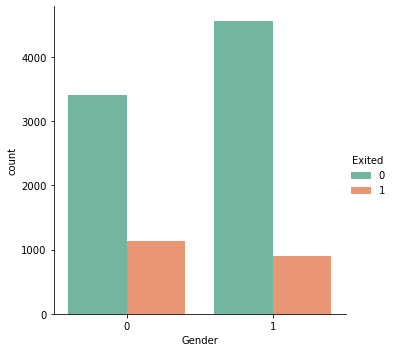

In [169]:
# male : 0 Female : 1
sns.catplot(x="Gender", 
            kind="count", 
            palette="Set2", 
            data= df, 
            hue = "Exited" )

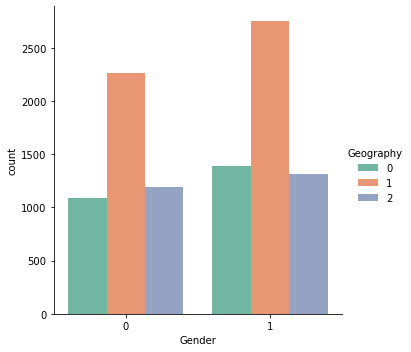

In [170]:
# male : 0 Female 1
# Geography Franca : 0 Espanha :1 Alemanha 2 
sns.catplot(x="Gender", 
            kind="count", 
            palette="Set2", 
            data= df, 
            hue = "Geography" )

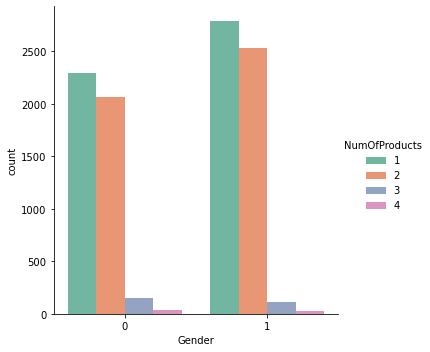

In [171]:
# 'Female': 0, 'Male': 1
sns.catplot(x="Gender", kind="count", palette="Set2", data= df, hue = "NumOfProducts" )

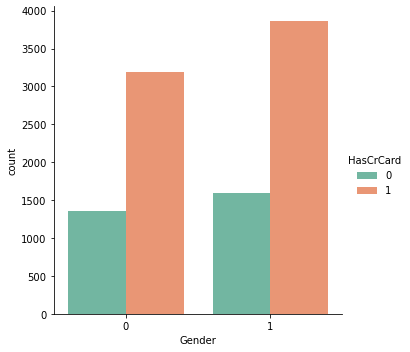

In [172]:
sns.catplot(x="Gender", kind="count", palette="Set2", data= df, hue = "HasCrCard" )

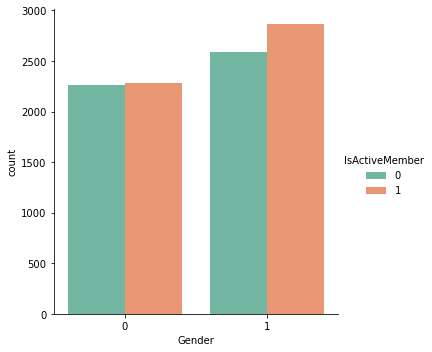

In [173]:
sns.catplot(x="Gender", 
            kind="count", 
            palette="Set2", 
            data= df, 
            hue = "IsActiveMember" )


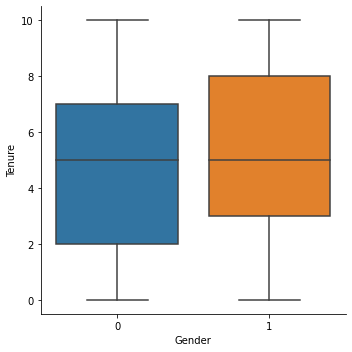

In [174]:
sns.catplot(x="Gender", 
            y="Tenure", 
            kind="box", data=df);

In [17]:
from IPython.display import display
import pandas as pd
  
# creating a DataFrame
dict = {'Total Male' : [(df['Gender']== 1).sum()],
        'Total Female' :[ (df['Gender']== 0).sum()],
        'Total Male ohne Interesse %':[((df['Gender'] == 0) & (df['Exited']==1)).sum() / 
                                       (df['Gender'] == 0).sum()*100],
        'Total Famale ohne interesse %':[((df['Gender'] == 1) & (df['Exited']==1)).sum() / 
                                         (df['Gender'] == 1).sum()*100]
         }



dataframe = pd.DataFrame(dict)
  
# displaying the DataFrame
#display(dataframe)



dataframe

,Total Male,Total Female,Total Male ohne Interesse %,Total Famale ohne interesse %
0,5457,4543,25.071539,16.455928


## 4.5 Interesse für Age
- Es wurde die Spalte Age_ord erzeugt (Codierung kategorialer Merkmale).	
- Die meisten Kunden sind zwischen 31 und 40 Jahren und kommen aus Spanien.
- Es gibt wenige Kunden zwischen 18-30 und 50-61 Jahren bei der Bank


In [11]:
df_2 =df = pd.read_parquet('df_prossesing.parquet')

In [12]:
df_2.head(70)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_ord,CreditScore_ord,Balance_ord,EstimatedSalary_ord
0,1,15634602,Hargrave,619,1,0,42,2,0.00,1,1,1,101348.88,1,41 to 50,501 to 699,0 to 25000,100001 to 125000
1,2,15647311,Hill,608,0,0,41,1,83807.86,1,0,1,112542.58,0,41 to 50,501 to 699,50001 to 100000,100001 to 125000
2,3,15619304,Onio,502,1,0,42,8,159660.80,3,1,0,113931.57,1,41 to 50,501 to 699,100001 to 200000,100001 to 125000
3,4,15701354,Boni,699,1,0,39,1,0.00,2,0,0,93826.63,0,31 to 40,501 to 699,0 to 25000,75001 to 100000
4,5,15737888,Mitchell,850,0,0,43,2,125510.82,1,1,1,79084.10,0,41 to 50,700 to 950,100001 to 200000,75001 to 100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,66,15789484,Hammond,751,2,0,36,6,169831.46,2,1,1,27758.36,0,31 to 40,700 to 950,100001 to 200000,25001 to 50000
66,67,15696061,Brownless,581,2,0,34,1,101633.04,1,1,0,110431.51,0,31 to 40,501 to 699,100001 to 200000,100001 to 125000
67,68,15641582,Chibugo,735,2,1,43,10,123180.01,2,1,1,196673.28,0,41 to 50,700 to 950,100001 to 200000,175001 to 200000
68,69,15638424,Glauert,661,2,0,35,5,150725.53,2,0,1,113656.85,0,31 to 40,501 to 699,100001 to 200000,100001 to 125000


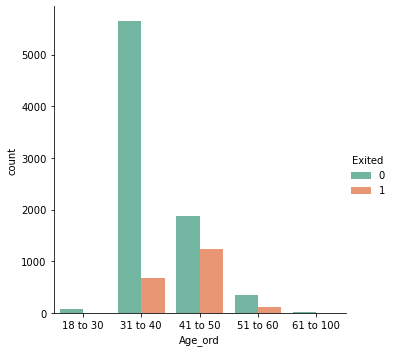

In [179]:
sns.catplot(x="Age_ord", 
            kind="count", 
            palette="Set2", 
            data= df, 
            hue = "Exited" )

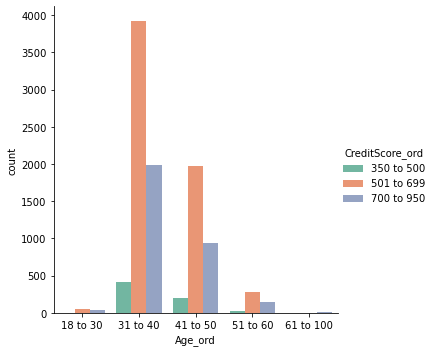

In [180]:
sns.catplot(x="Age_ord", kind="count", palette="Set2", data= df, hue = "CreditScore_ord" )

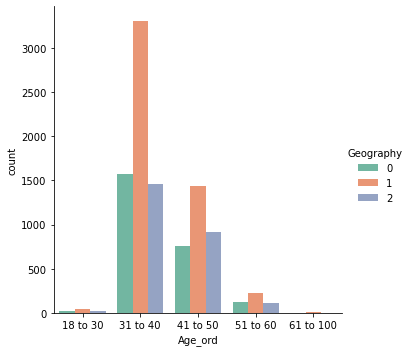

In [181]:
sns.catplot(x="Age_ord", 
            kind="count", 
            palette="Set2", 
            data= df, 
            hue = "Geography" )

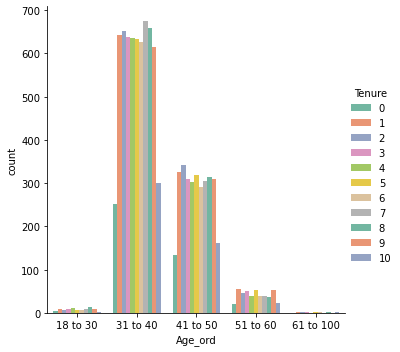

In [182]:
sns.catplot(x="Age_ord", kind="count", palette="Set2", data= df, hue = "Tenure" )

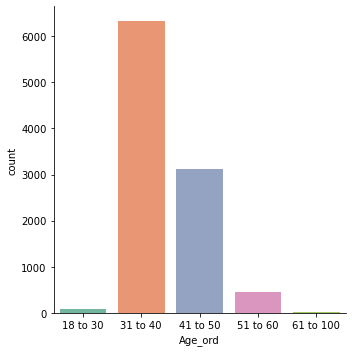

In [183]:
# alter mit Age-ord
import seaborn as sns
%matplotlib inline
sns.catplot(x="Age_ord", 
            kind="count", 
            palette="Set2", 
            data= df )

## 4.5 Interesse für Gehalt
- Die Kunden haben ein EstimatedSalary von 10000 Dolar


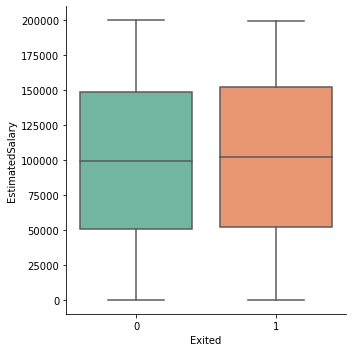

In [184]:
sns.catplot(x="Exited", kind="box", palette="Set2", data= df, y= "EstimatedSalary" )

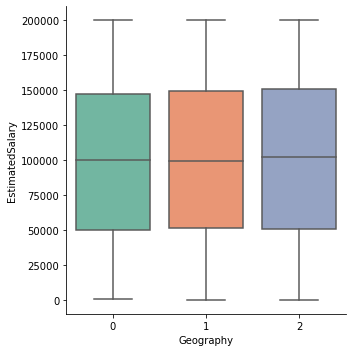

In [185]:
sns.catplot(x="Geography", kind="box", palette="Set2", data= df, y= "EstimatedSalary" )

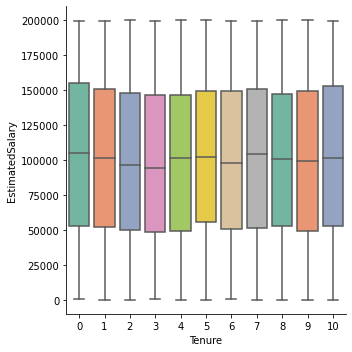

In [186]:
sns.catplot(x="Tenure", kind="box", palette="Set2", data= df, y= "EstimatedSalary" )


## 4.7 Interesse für Land
- 42,04% der Kunden kommen aus Spanien.
- 25.91% der Kunden sind aktiv.
- 83,84% der Kunden aus Spanien wollen die Bank nicht verlassen.
- In Frankreich haben 810 Kunden die Bank bereits verlassen
- 2477 Kunden kommen aus Frankreich , 5014 aus Spanien und 2509 aus Deutschland
- Geographie Frankreich : 0 Spanien :1 Deutschland 2 

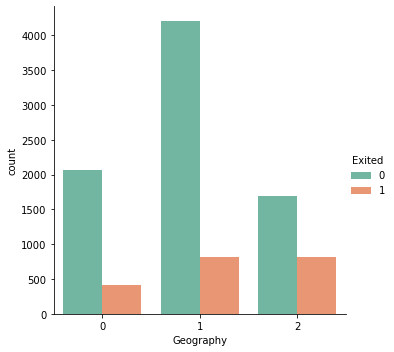

In [187]:
# Geography Franca : 0 Espanha :1 Alemanha 2 
sns.catplot(x="Geography", 
            kind="count", 
            palette="Set2", 
            data= df, 
            hue = "Exited" )

In [188]:
df2 =df.groupby(["Geography"])
['Exited'].count().to_frame().
rename(columns={'id':'contador'}).
reset_index()

In [189]:
df2.head()

,Geography,Exited
0,0,2477
1,1,5014
2,2,2509


In [190]:
df3=df.groupby(['Geography','NumOfProducts']).mean()

In [191]:
df3.head(70)

RowNumber    CustomerId  CreditScore    Gender  \
Geography NumOfProducts                                                     
0         1              4911.444717  1.569025e+07   648.929566  0.577396   
          2              4982.774303  1.569355e+07   654.097210  0.554522   
          3              5094.545455  1.569702e+07   647.015152  0.378788   
          4              5009.714286  1.565948e+07   644.428571  0.285714   
1         1              4985.562848  1.568955e+07   647.989658  0.556086   
          2              5082.617237  1.569161e+07   651.518378  0.547529   
          3              4551.307692  1.569702e+07   643.615385  0.471154   
          4              5479.310345  1.568453e+07   665.896552  0.344828   
2         1              5005.431431  1.568923e+07   651.402520  0.507784   
          2              4995.390385  1.569158e+07   651.543269  0.555769   
          3              5016.916667  1.570273e+07   653.718750  0.447917   
          4              4855.958333  1.567208e+07   641.375000  0.416667   

                               Age    Tenure        Balance  HasCrCard  \
Geography NumOfProducts                                                  
0         1              39.704341  4.965602   90595.373063   0.688780   
          2              37.901944  5.114962   32690.852688   0.704987   
          3              40.909091  4.803030   48385.897121   0.590909   
          4              45.142857  4.857143   91407.651429   1.000000   
1         1              39.175418  4.962609   90977.877896   0.710024   
          2              37.453739  5.032108   31828.097047   0.702577   
          3              44.221154  5.125000   50071.822500   0.759615   
          4              46.862069  5.965517   71362.731379   0.551724   
2         1              40.572276  5.005189  119868.328139   0.705708   
          2              38.267308  5.025000  119341.245038   0.720192   
          3              43.656250  5.010417  121572.672396   0.750000   
          4              44.416667  4.625000  121442.305417   0.750000   

                         IsActiveMember  EstimatedSalary    Exited  
Geography NumOfProducts                                             
0         1                    0.551188     99280.483112  0.218673  
          2                    0.514793     99525.563609  0.073542  
          3                    0.424242    103223.656970  0.787879  
          4                    0.285714     77332.078571  1.000000  
1         1                    0.501591     98760.372673  0.224344  
          2                    0.536122    100748.059649  0.057034  
          3                    0.423077    102831.108558  0.788462  
          4                    0.586207    118821.490345  1.000000  
2         1                    0.466271    101029.034136  0.428466  
          2                    0.546154    100832.057606  0.121154  
          3                    0.427083    106681.521667  0.895833  
          4                    0.416667     95778.151250  1.000000

In [192]:
((df["Geography"]==1)&(df['Exited']==0)).sum()

4204

In [193]:
# 83,84% haben interesse für die Bank Spain :1
((df["Geography"]==1)
 &(df['Exited']==0))
.sum()/5014

0.8384523334662943

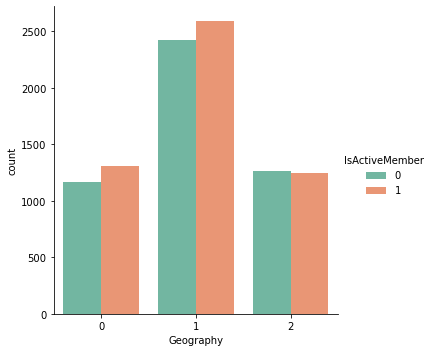

In [194]:
sns.catplot(x="Geography", kind="count", palette="Set2", data= df, hue = "IsActiveMember" )

In [195]:
group=df.groupby(["Geography",'IsActiveMember'])
print(group.size().reset_index(name='counts'))

   Geography  IsActiveMember  counts
0          0               0    1165
1          0               1    1312
2          1               0    2423
3          1               1    2591
4          2               0    1261
5          2               1    1248


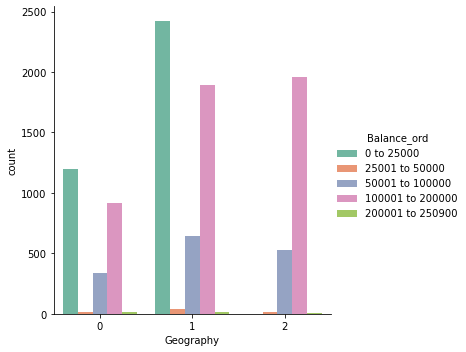

In [196]:
sns.catplot(x="Geography", kind="count", palette="Set2", data= df_2, hue = "Balance_ord" )

In [197]:
group=df.groupby(["Geography",'Exited'])
print(group.size().
reset_index(name='counts'))

   Geography  Exited  counts
0          0       0    2064
1          0       1     413
2          1       0    4204
3          1       1     810
4          2       0    1695
5          2       1     814


## 4.8 Interesse por EstimatedSalar

In [8]:
df3 = pd.read_parquet('df_prossesing.parquet')
df3.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_ord,CreditScore_ord,Balance_ord,EstimatedSalary_ord
0,1,15634602,Hargrave,619,1,0,42,2,0.00,1,1,1,101348.88,1,41 to 50,501 to 699,0 to 25000,100001 to 125000
1,2,15647311,Hill,608,0,0,41,1,83807.86,1,0,1,112542.58,0,41 to 50,501 to 699,50001 to 100000,100001 to 125000
2,3,15619304,Onio,502,1,0,42,8,159660.80,3,1,0,113931.57,1,41 to 50,501 to 699,100001 to 200000,100001 to 125000
3,4,15701354,Boni,699,1,0,39,1,0.00,2,0,0,93826.63,0,31 to 40,501 to 699,0 to 25000,75001 to 100000
4,5,15737888,Mitchell,850,0,0,43,2,125510.82,1,1,1,79084.10,0,41 to 50,700 to 950,100001 to 200000,75001 to 100000


In [9]:
df[['Gender','EstimatedSalary_ord']].groupby('EstimatedSalary_ord').count()

,Gender
EstimatedSalary_ord,
0 to 25000,1217
25001 to 50000,1236
50001 to 75000,1269
75001 to 100000,1268
100001 to 125000,1276
125001 to 150000,1279
150001 to 175000,1195
175001 to 200000,1260


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

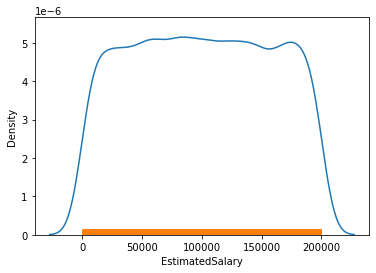

In [200]:
sns.kdeplot(df3['EstimatedSalary'])
sns.rugplot(df3['EstimatedSalary'])

## 4.7 Interesse por HasCrCard

- Die meisten Kunden, die eine Karte haben, bleiben bei der Bank
- Kunden aus Spanien benutzen meinsten eine Kreditkarte.
- kunden mit 3 oder 4 Produkten tendieren die Bank zu verlassen

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

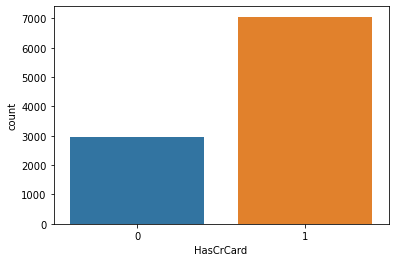

In [201]:
sns.countplot(x="HasCrCard",data=df)

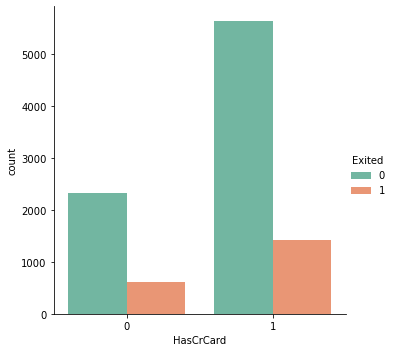

In [202]:
sns.catplot(x="HasCrCard", kind="count", palette="Set2", data= df, hue = "Exited" )

In [203]:
df.groupby(['HasCrCard','Exited']).size().reset_index().rename(columns={0:'contagem'})

,HasCrCard,Exited,contagem
0,0,0,2332
1,0,1,613
2,1,0,5631
3,1,1,1424


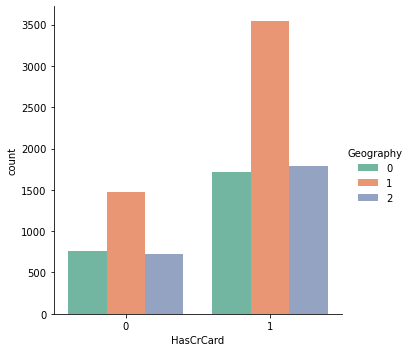

In [204]:
sns.catplot(x="HasCrCard", kind="count", palette="Set2", data= df, hue = "Geography" )

In [205]:
df[['NumOfProducts','Exited']].groupby('NumOfProducts').describe().transpose()

NumOfProducts            1            2           3     4
Exited count   5084.000000  4590.000000  266.000000  60.0
       mean       0.277144     0.075817    0.827068   1.0
       std        0.447632     0.264734    0.378902   0.0
       min        0.000000     0.000000    0.000000   1.0
       25%        0.000000     0.000000    1.000000   1.0
       50%        0.000000     0.000000    1.000000   1.0
       75%        1.000000     0.000000    1.000000   1.0
       max        1.000000     1.000000    1.000000   1.0

## 4.8 Interesse für Korrelation
- Es gibt eine Korrelation zwischen Banlace und Geography von 0.33
- Und eine Korrelation zwischen Age und Exited von 0.29

In [206]:
df3.corr()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.006028,0.018196,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,-0.006670,-0.002641,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,0.000478,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.006028,-0.006670,0.000478,1.000000,-0.025446,0.029824,-0.002713,0.328736,-0.011923,0.014734,-0.022807,0.010285,0.138714
Gender,0.018196,-0.002641,-0.002857,-0.025446,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,0.000783,0.009497,-0.003965,0.029824,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.002713,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.328736,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.011923,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,0.014734,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138


<AxesSubplot:>

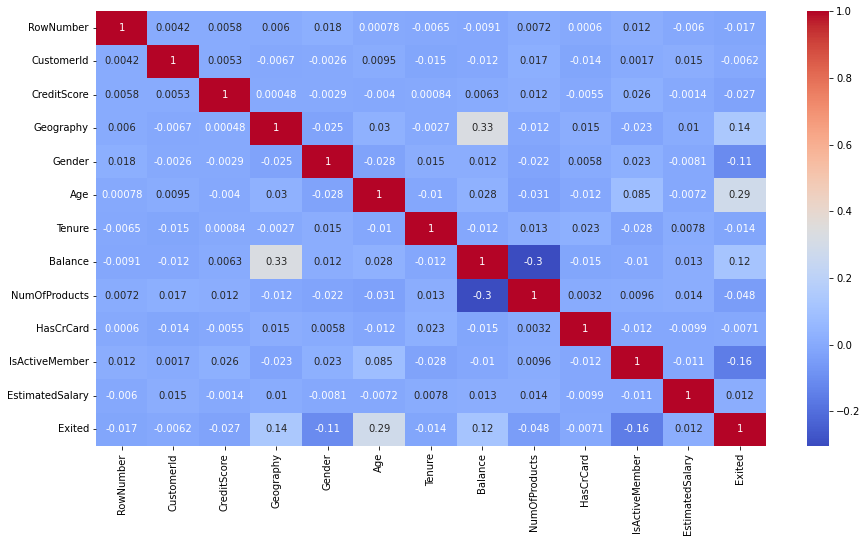

In [207]:
plt.figure(figsize = (15,8))
sns.heatmap(df3.corr(),cmap='coolwarm',annot=True)


## 4.9 Statistiken nach Gruppen auswerten
- Kunden aus Deutschland mit 3 Produkten oder mehr verlassen die Bank mit einer Wahrscheinlichkeit von 0.8958
- Männliche Kunden zwischen 41 e 51 und eine CrediScore von 350 bis 500 verlassen die Bank mit einer Wahrscheinlichkeit von 0.45
- Männliche Kunden zwischen 41 e 51 verlassen die Bank mit einer Wahrscheinlichkeit von 0.4923




In [208]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_ord,CreditScore_ord,Balance_ord,EstimatedSalary_ord
0,1,15634602,Hargrave,619,1,0,42,2,0.00,1,1,1,101348.88,1,41 to 50,501 to 699,0 to 25000,100001 to 125000
1,2,15647311,Hill,608,0,0,41,1,83807.86,1,0,1,112542.58,0,41 to 50,501 to 699,50001 to 100000,100001 to 125000
2,3,15619304,Onio,502,1,0,42,8,159660.80,3,1,0,113931.57,1,41 to 50,501 to 699,100001 to 200000,100001 to 125000
3,4,15701354,Boni,699,1,0,39,1,0.00,2,0,0,93826.63,0,31 to 40,501 to 699,0 to 25000,75001 to 100000
4,5,15737888,Mitchell,850,0,0,43,2,125510.82,1,1,1,79084.10,0,41 to 50,700 to 950,100001 to 200000,75001 to 100000


In [209]:
# 2 Spalten Geography und NumOfProducts mit aggfunc

pd.pivot_table(df, values='Exited',
               index=['Geography'],
               columns=['NumOfProducts'],
               aggfunc=np.mean)

NumOfProducts,1,2,3,4
Geography,,,,
0,0.218673,0.073542,0.787879,1.0
1,0.224344,0.057034,0.788462,1.0
2,0.428466,0.121154,0.895833,1.0


In [210]:
pd.pivot_table(df, values='Exited', index=['Geography'],
               columns=['HasCrCard'], aggfunc=np.mean)

HasCrCard,0,1
Geography,,
0,0.178571,0.161534
1,0.163834,0.160598
2,0.330084,0.322166


In [211]:
pd.pivot_table(df, values='Exited', index=['Balance_ord'],
               columns=['EstimatedSalary_ord'], aggfunc=np.mean)

EstimatedSalary_ord,0 to 25000,25001 to 50000,50001 to 75000,75001 to 100000,100001 to 125000,125001 to 150000,150001 to 175000,175001 to 200000
Balance_ord,,,,,,,,
0 to 25000,0.124464,0.133630,0.136674,0.136364,0.135255,0.146608,0.144828,0.156109
25001 to 50000,0.142857,0.375000,0.416667,0.333333,0.333333,0.375000,0.200000,0.272727
50001 to 100000,0.188889,0.144444,0.188119,0.220994,0.209756,0.191710,0.238095,0.210000
100001 to 200000,0.262032,0.261307,0.263502,0.213559,0.244224,0.245528,0.252577,0.258706
200001 to 250900,0.666667,1.000000,0.400000,0.750000,0.200000,0.500000,0.600000,0.750000


In [212]:
pd.pivot_table(df, values='Exited', index=['CreditScore_ord'],
               columns=['Age_ord'], aggfunc=np.mean)

Age_ord,18 to 30,31 to 40,41 to 50,51 to 60,61 to 100
CreditScore_ord,,,,,
350 to 500,0.000000,0.103365,0.492308,0.304348,1.0
501 to 699,0.075472,0.109411,0.385432,0.249123,0.0
700 to 950,0.030303,0.103968,0.398089,0.250000,0.0


In [213]:
pd.pivot_table(df, values='Exited', index=['EstimatedSalary_ord'],
               columns=['Age_ord'], aggfunc=np.mean)

Age_ord,18 to 30,31 to 40,41 to 50,51 to 60,61 to 100
EstimatedSalary_ord,,,,,
0 to 25000,0.000000,0.101394,0.406077,0.288462,NaN
25001 to 50000,0.000000,0.099483,0.401575,0.253731,0.00
50001 to 75000,0.153846,0.139744,0.348039,0.203125,0.00
75001 to 100000,0.000000,0.090575,0.385390,0.229167,0.00
100001 to 125000,0.071429,0.107407,0.390181,0.265625,0.00
125001 to 150000,0.090909,0.105521,0.400498,0.254902,NaN
150001 to 175000,0.000000,0.104139,0.424165,0.229167,NaN
175001 to 200000,0.090909,0.113065,0.419437,0.293103,0.25


In [214]:
pd.pivot_table(df, values='Exited', 
               index=['Gender'],
               columns=['Age_ord'], 
               aggfunc=np.mean)

Age_ord,18 to 30,31 to 40,41 to 50,51 to 60,61 to 100
Gender,,,,,
0,0.076923,0.138642,0.458082,0.302885,0.2
1,0.047619,0.082741,0.340098,0.209016,0.0


In [215]:
df['Age'].mean()

38.9218

In [216]:
pd.pivot_table(df, values='Exited', 
               index=['CreditScore_ord'],
               columns=['Age_ord'], 
               aggfunc=np.mean)

Age_ord,18 to 30,31 to 40,41 to 50,51 to 60,61 to 100
CreditScore_ord,,,,,
350 to 500,0.000000,0.103365,0.492308,0.304348,1.0
501 to 699,0.075472,0.109411,0.385432,0.249123,0.0
700 to 950,0.030303,0.103968,0.398089,0.250000,0.0


In [16]:
pd.pivot_table(df, values='Exited', index=['Tenure'],
               columns=['Age_ord'], aggfunc=np.mean)

Age_ord,18 to 30,31 to 40,41 to 50,51 to 60,61 to 100
Tenure,,,,,
0,0.200000,0.134387,0.429630,0.100000,NaN
1,0.000000,0.105919,0.434251,0.392857,0.0
2,0.000000,0.101072,0.372434,0.173913,0.0
3,0.000000,0.106583,0.419355,0.300000,0.0
4,0.083333,0.100629,0.425743,0.236842,NaN
5,0.000000,0.110585,0.389937,0.283019,0.0
6,0.000000,0.125997,0.380137,0.157895,0.0
7,0.222222,0.093333,0.334426,0.256410,NaN
8,0.000000,0.094225,0.393651,0.270270,0.5


In [19]:
df['Tenure'].mean()

5.0128